# Bank Marketing_Capstone project

## Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,cohen_kappa_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
import imblearn
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import probplot
from statsmodels.stats.diagnostic import linear_rainbow
from scipy import stats
from sklearn.metrics import mean_squared_error,r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import boxcox
from statsmodels.stats.diagnostic import het_goldfeldquandt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## Read Dataset

In [2]:
df=pd.read_excel('Bank_Marketing_Dataset.xlsx')

In [3]:
df.head()

,age,age group,eligible,job,salary,marital,education,marital-education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
0,58,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,4,Y,technician,60000,single,secondary,single-secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,3,Y,entrepreneur,120000,married,secondary,married-secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,4,Y,blue-collar,20000,married,unknown,married-unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


## Info

In [4]:
df.shape

(45211, 23)

### There are 45211 rows and 23 columns in the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   age group          45211 non-null  int64 
 2   eligible           45211 non-null  object
 3   job                45211 non-null  object
 4   salary             45211 non-null  int64 
 5   marital            45211 non-null  object
 6   education          45211 non-null  object
 7   marital-education  45211 non-null  object
 8   targeted           45211 non-null  object
 9   default            45211 non-null  object
 10  balance            45211 non-null  int64 
 11  housing            45211 non-null  object
 12  loan               45211 non-null  object
 13  contact            45211 non-null  object
 14  day                45211 non-null  int64 
 15  month              45211 non-null  object
 16  duration           45211 non-null  int64

In [6]:
df.describe()

,age,age group,salary,balance,day,duration,campaign,pdays,previous,response
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,3.645861,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,1.083271,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,1.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,3.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,3.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,4.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,9.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


### There is no suspectable inference from the 5 point summary except Salary column

In [7]:
df[df['salary']==0].head()

,age,age group,eligible,job,salary,marital,education,marital-education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0
216,47,4,Y,unknown,0,married,unknown,married-unknown,no,no,28,no,no,unknown,5,may,338,2,-1,0,unknown,no,0
354,59,5,Y,unknown,0,divorced,unknown,divorced-unknown,no,no,27,no,no,unknown,5,may,347,3,-1,0,unknown,no,0
876,37,3,Y,unknown,0,single,unknown,single-unknown,no,no,414,yes,no,unknown,7,may,131,1,-1,0,unknown,no,0
1072,29,2,Y,unknown,0,single,primary,single-primary,yes,no,50,yes,no,unknown,7,may,50,2,-1,0,unknown,no,0


### Where Salary = 0 , Job is "Unknown". May be house wives or people without a job 

## Null Values

In [8]:
df.isnull().sum()

age                  0
age group            0
eligible             0
job                  0
salary               0
marital              0
education            0
marital-education    0
targeted             0
default              0
balance              0
housing              0
loan                 0
contact              0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
y                    0
response             0
dtype: int64

#### No null Values in the Dataset

## Data Cleaning

# Insignificant columns

In [9]:
df.columns

Index(['age', 'age group', 'eligible', 'job', 'salary', 'marital', 'education',
       'marital-education', 'targeted', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'response'],
      dtype='object')

In [10]:
df=df.drop(['age','marital-education','y'],axis=1)

### Removed age, marital-education and y columns as they are insignificant for prediction

In [11]:
df.shape

(45211, 20)

## Identify the right data type of the columns

In [12]:
for i in df.columns:

    print(i,' ',' ',df[i].nunique())


age group     9
eligible     2
job     12
salary     11
marital     3
education     4
targeted     2
default     2
balance     7168
housing     2
loan     2
contact     3
day     31
month     12
duration     1573
campaign     48
pdays     559
previous     41
poutcome     4
response     2


In [13]:
for i in df.columns:
    if (df[i].nunique()) <= 10:
        print('(',i,')','column','is Categorical')

( age group ) column is Categorical
( eligible ) column is Categorical
( marital ) column is Categorical
( education ) column is Categorical
( targeted ) column is Categorical
( default ) column is Categorical
( housing ) column is Categorical
( loan ) column is Categorical
( contact ) column is Categorical
( poutcome ) column is Categorical
( response ) column is Categorical


In [14]:
df.dtypes

age group     int64
eligible     object
job          object
salary        int64
marital      object
education    object
targeted     object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
response      int64
dtype: object

### Age_group to be converted to categorical

In [15]:
df['age group'].dtypes

dtype('int64')

In [16]:
df['age group']=df['age group'].astype('object')

In [17]:
df['age group'].dtypes

dtype('O')

### Convert Target variable to Categorical column

In [18]:
df['response']=df['response'].astype('object')

### Split Categorical & numerical columns for further analysis

In [19]:
num_col = df.select_dtypes(include=np.number)
cat_col = df.select_dtypes(include=np.object)
cat_col = cat_col.drop('response',1) # Dropping target variable
cat_col.head()


,age group,eligible,job,marital,education,targeted,default,housing,loan,contact,month,poutcome
0,5,Y,management,married,tertiary,yes,no,yes,no,unknown,may,unknown
1,4,Y,technician,single,secondary,yes,no,yes,no,unknown,may,unknown
2,3,Y,entrepreneur,married,secondary,yes,no,yes,yes,unknown,may,unknown
3,4,Y,blue-collar,married,unknown,no,no,yes,no,unknown,may,unknown
4,3,Y,unknown,single,unknown,no,no,no,no,unknown,may,unknown


In [20]:
num_col.head()

,salary,balance,day,duration,campaign,pdays,previous
0,100000,2143,5,261,1,-1,0
1,60000,29,5,151,1,-1,0
2,120000,2,5,76,1,-1,0
3,20000,1506,5,92,1,-1,0
4,0,1,5,198,1,-1,0


## Identify any insignificant or incorrect values in the dataset

In [21]:
for i in df.columns:
    print(' ')
    print(i,' ','\n',df[i].unique())

 
age group   
 [5 4 3 2 6 8 7 1 9]
 
eligible   
 ['Y' 'N']
 
job   
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
 
salary   
 [100000  60000 120000  20000      0  55000  50000  70000   8000  16000
   4000]
 
marital   
 ['married' 'single' 'divorced']
 
education   
 ['tertiary' 'secondary' 'unknown' 'primary']
 
targeted   
 ['yes' 'no']
 
default   
 ['no' 'yes']
 
balance   
 [ 2143    29     2 ...  8205 14204 16353]
 
housing   
 ['yes' 'no']
 
loan   
 ['no' 'yes']
 
contact   
 ['unknown' 'cellular' 'telephone']
 
day   
 [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
 
month   
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
 
duration   
 [ 261  151   76 ... 1298 1246 1556]
 
campaign   
 [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 

### Columns (job, education, contact,poutcome) have some values as "Unknown" 

In [22]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

### Replacing all 'Unknown' as null

In [23]:
for i in df.columns:
    df[i]=df[i].replace('unknown',np.nan)

In [24]:
df.isnull().sum()

age group        0
eligible         0
job            288
salary           0
marital          0
education     1857
targeted         0
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
response         0
dtype: int64

### After replacing the values, we have Null values in 4 columns

#### Treating Null values

In [25]:
print('Percentage of Null values :','\n',(df.isnull().sum()/len(df)*100).sort_values(ascending=False).head())

Percentage of Null values : 
 poutcome    81.747805
contact     28.798301
education    4.107407
job          0.637013
response     0.000000
dtype: float64


In [26]:
df=df.drop('poutcome',axis=1) 

### Dropping Poutcome column as it has (>80% NULL values)

In [27]:
df.columns

Index(['age group', 'eligible', 'job', 'salary', 'marital', 'education',
       'targeted', 'default', 'balance', 'housing', 'loan', 'contact', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'response'],
      dtype='object')

In [28]:
print('Percentage of Null values :','\n',(df.isnull().sum()/len(df)*100).sort_values(ascending=False).head())

Percentage of Null values : 
 contact     28.798301
education    4.107407
job          0.637013
response     0.000000
balance      0.000000
dtype: float64


In [29]:
df['contact']=df['contact'].fillna(df['contact'].mode()[0])

In [30]:
df['job']=df['job'].fillna(df['job'].mode()[0])

In [31]:
df['education']=df['education'].fillna(df['education'].mode()[0])

In [32]:
df.isnull().sum()

age group    0
eligible     0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
response     0
dtype: int64

In [33]:
df.head()

,age group,eligible,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response
0,5,Y,management,100000,married,tertiary,yes,no,2143,yes,no,cellular,5,may,261,1,-1,0,0
1,4,Y,technician,60000,single,secondary,yes,no,29,yes,no,cellular,5,may,151,1,-1,0,0
2,3,Y,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,cellular,5,may,76,1,-1,0,0
3,4,Y,blue-collar,20000,married,secondary,no,no,1506,yes,no,cellular,5,may,92,1,-1,0,0
4,3,Y,blue-collar,0,single,secondary,no,no,1,no,no,cellular,5,may,198,1,-1,0,0


# Univariate Analysis

# Outliers

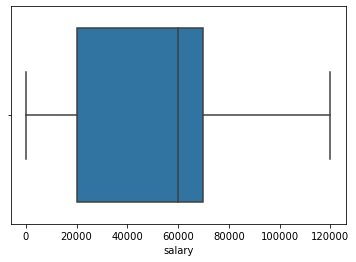

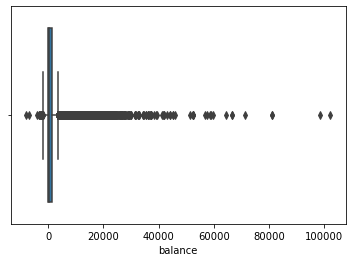

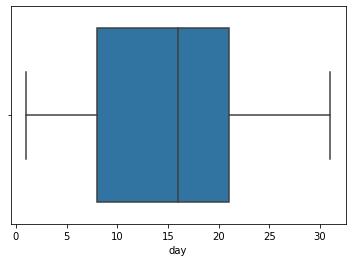

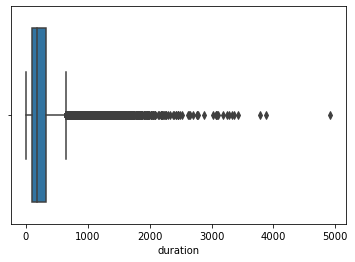

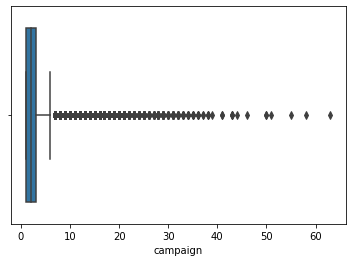

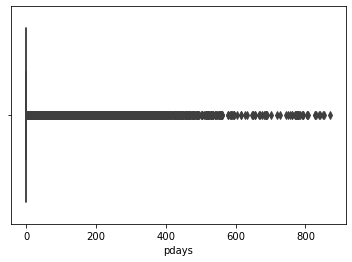

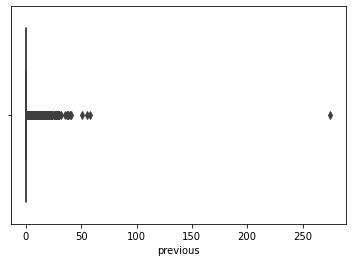

In [34]:
for i in num_col:
    sns.boxplot(num_col[i])
    plt.show()

# Outliers are observed from the boxplot

In [35]:
df1 = df.copy()

In [36]:
df1['age group']=df1['age group'].astype('object')

In [37]:
df1['response']=df1['response'].astype('object')

In [38]:
df1_num = df1.select_dtypes(include=np.number)
df1_cat = df1.select_dtypes(include=np.object)
df1_cat = df1_cat.drop('response',1) # Dropping target variable


In [39]:
df1_cat.head()

,age group,eligible,job,marital,education,targeted,default,housing,loan,contact,month
0,5,Y,management,married,tertiary,yes,no,yes,no,cellular,may
1,4,Y,technician,single,secondary,yes,no,yes,no,cellular,may
2,3,Y,entrepreneur,married,secondary,yes,no,yes,yes,cellular,may
3,4,Y,blue-collar,married,secondary,no,no,yes,no,cellular,may
4,3,Y,blue-collar,single,secondary,no,no,no,no,cellular,may


In [40]:
df1_num.head()

,salary,balance,day,duration,campaign,pdays,previous
0,100000,2143,5,261,1,-1,0
1,60000,29,5,151,1,-1,0
2,120000,2,5,76,1,-1,0
3,20000,1506,5,92,1,-1,0
4,0,1,5,198,1,-1,0


In [41]:
df1['balance'] = np.sqrt(df1['balance'])

<AxesSubplot:xlabel='balance'>

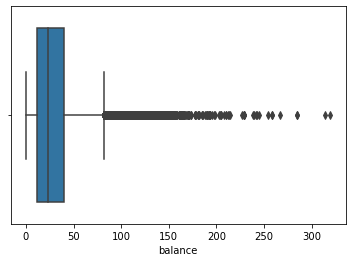

In [42]:
sns.boxplot(df1['balance'])

In [43]:
df1['duration'] = np.sqrt(df1['duration'])

<AxesSubplot:xlabel='duration'>

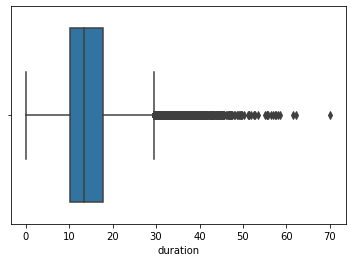

In [44]:
sns.boxplot(df1['duration'])

In [45]:
df1['campaign'] = np.log(df1['campaign'])

<AxesSubplot:xlabel='campaign'>

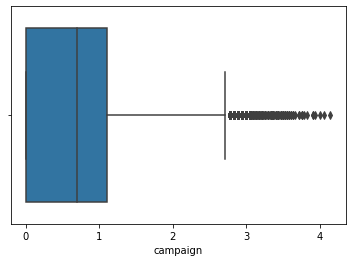

In [46]:
sns.boxplot(df1['campaign'])

In [47]:
df1['pdays'] = np.sqrt(df1['pdays'])

<AxesSubplot:xlabel='pdays'>

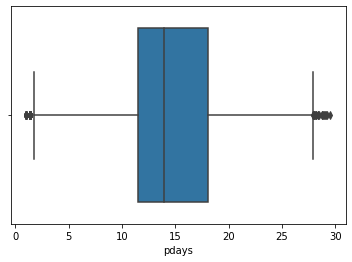

In [48]:
sns.boxplot(df1['pdays'])

In [49]:
df1['previous'] = np.sqrt(df1['previous'])

<AxesSubplot:xlabel='previous'>

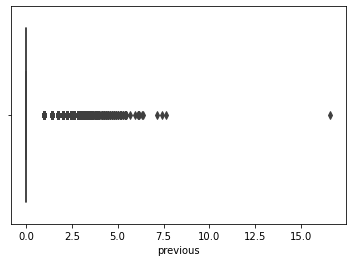

In [50]:
sns.boxplot(df1['previous'])

## Skewness before log transformation

In [51]:
df.skew().sort_values(ascending=False)

previous    41.846454
balance      8.360308
campaign     4.898650
duration     3.144318
pdays        2.615715
response     2.383480
age group    0.622491
salary       0.137829
day          0.093079
dtype: float64

## Skewness after log transformation

In [52]:
df1.skew().sort_values(ascending=False)

previous     2.880045
response     2.383480
balance      1.901328
duration     1.173744
campaign     0.880211
age group    0.622491
salary       0.137829
day          0.093079
pdays       -0.292640
dtype: float64

## All columns is continuous in nature and are important for analysis, removing outliers will lead to loss of data.  So, using Sqrt and  log transformation to treat outliers

## Applying Log & SQRT transforms, skewness was brought down significantly, but outliers were not removed

## Distribution

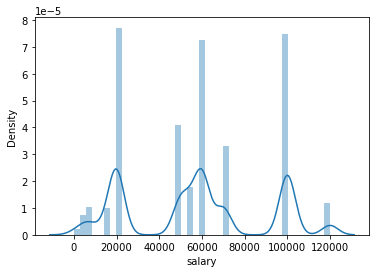

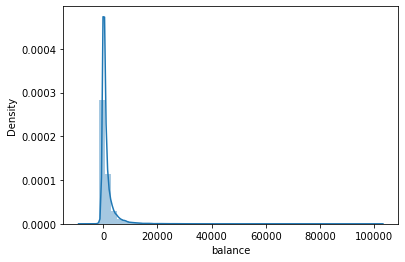

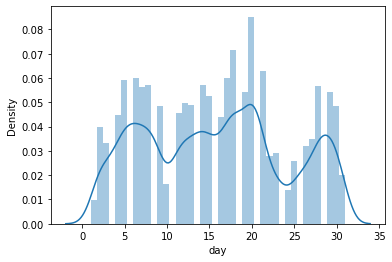

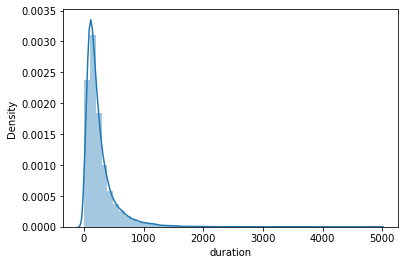

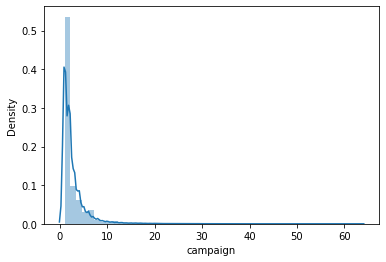

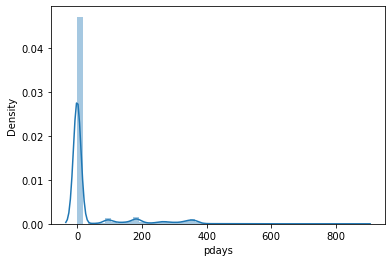

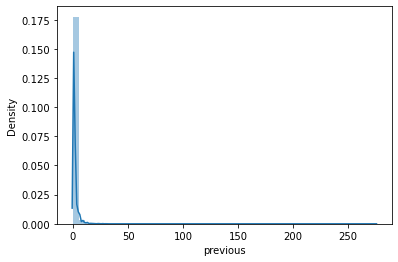

In [53]:
for i in df1_num.columns:
    sns.distplot(df1_num[i])
    plt.show()

## Salary & day are multimodal distributions
## Other numerical columns are Right skewed

## Relationship between Variables

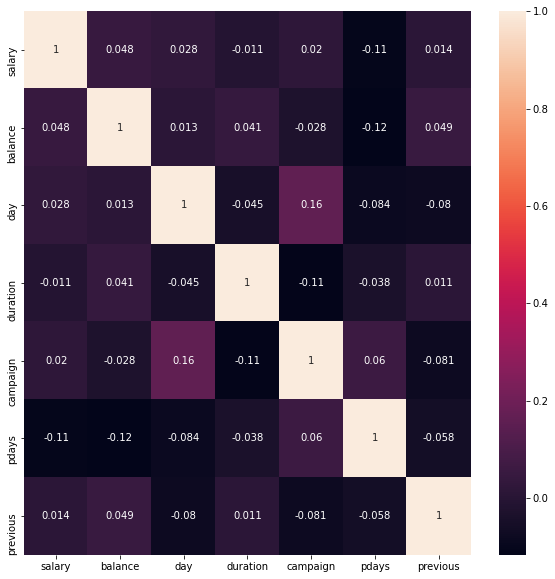

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True)
plt.show()

## No strong correlation between variables is observed

<Figure size 1296x864 with 0 Axes>

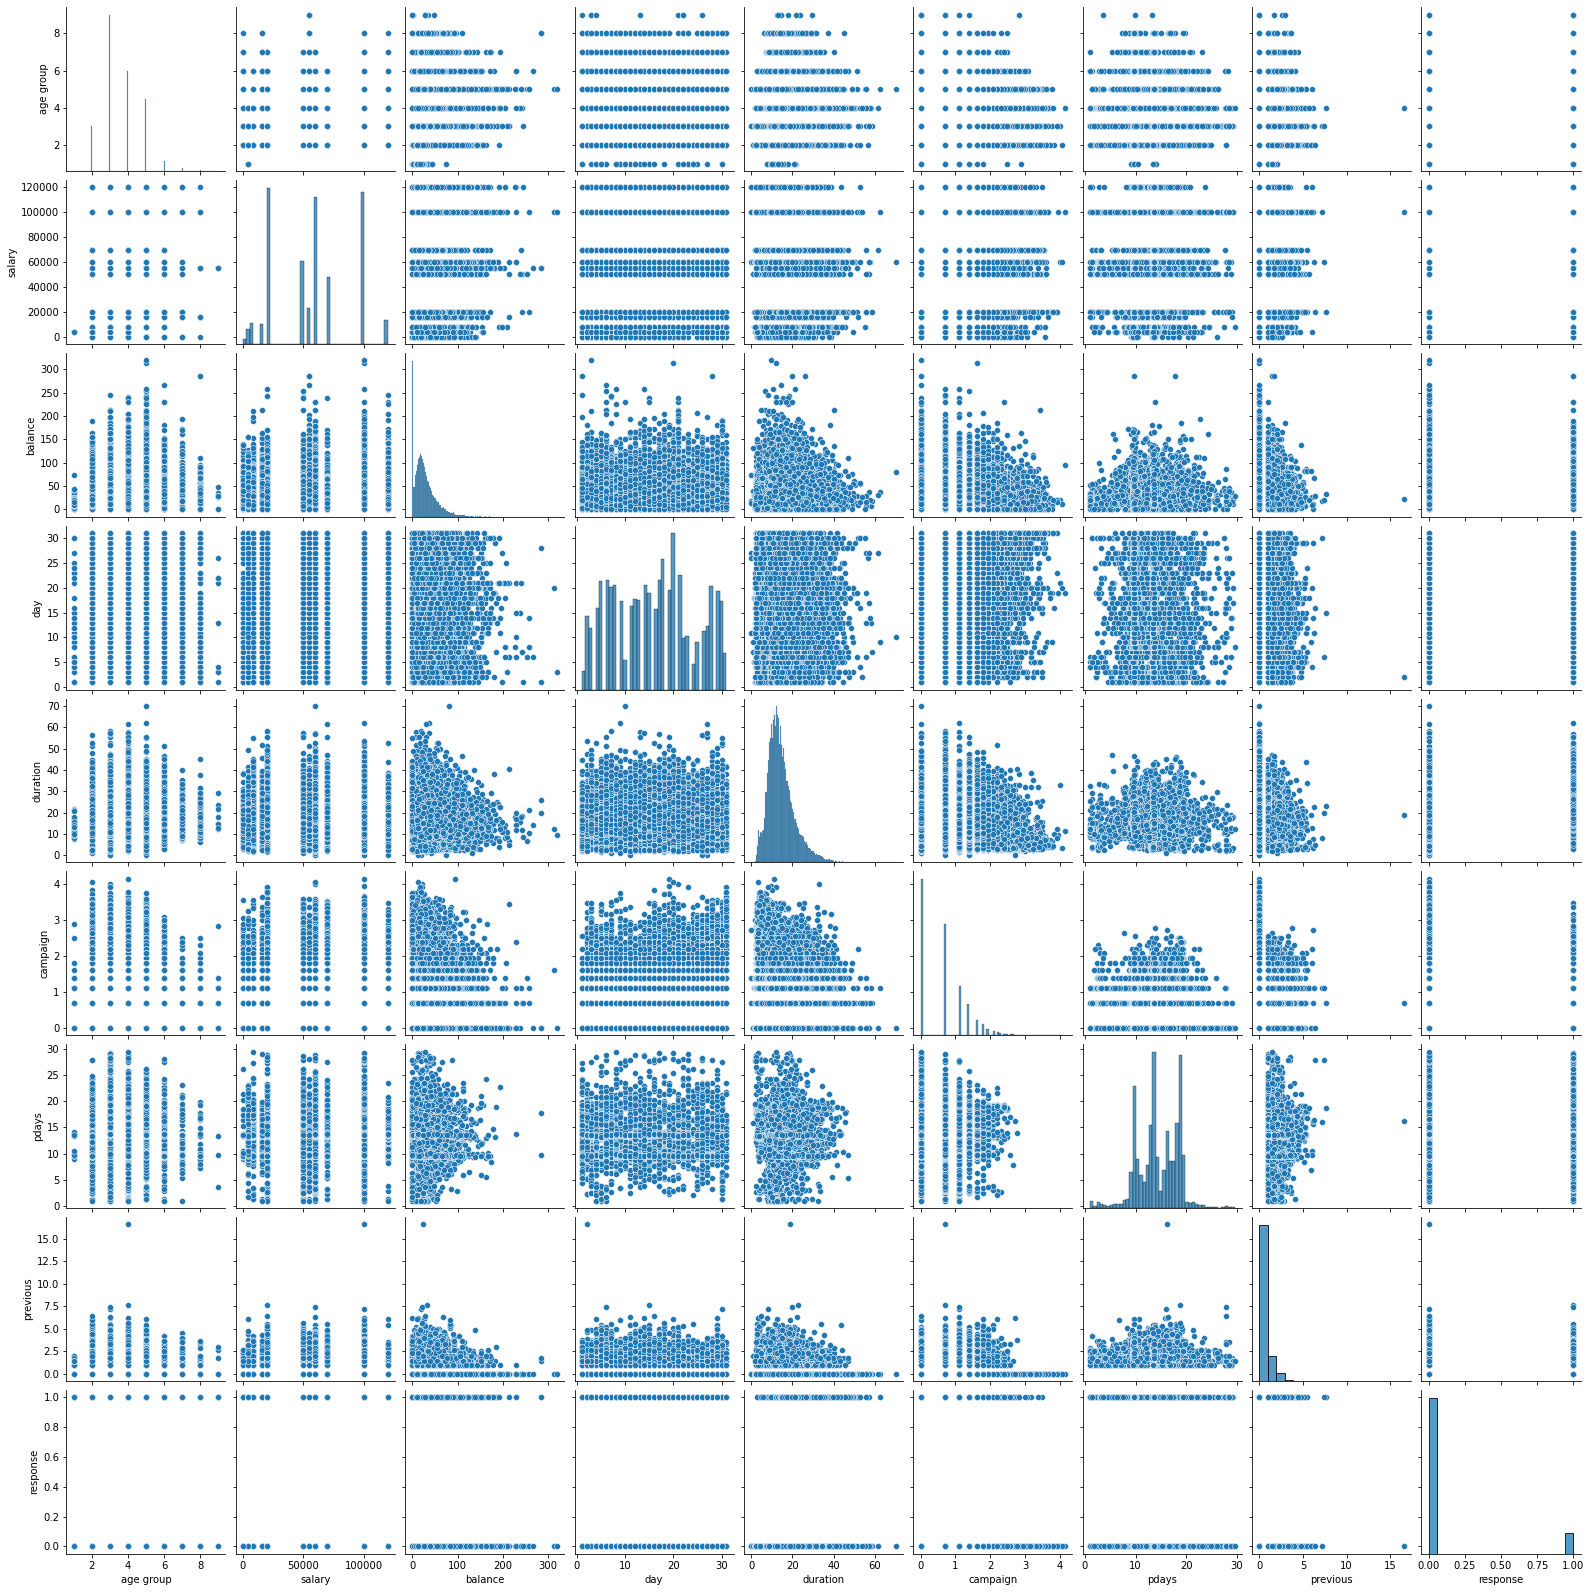

In [55]:
plt.figure(figsize=(18,12))
sns.pairplot(df1)

##### No Strong Correlation between variables

# Bivariate Analysis

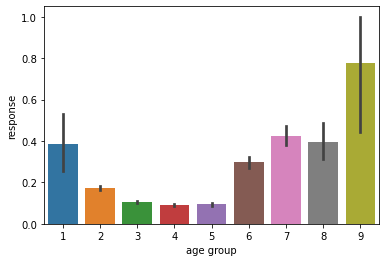

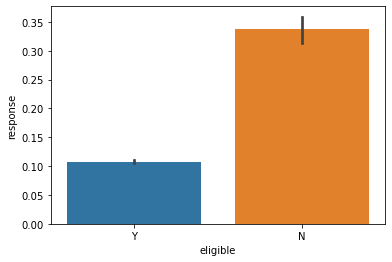

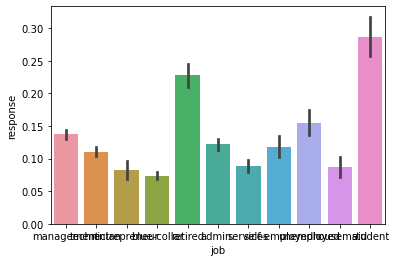

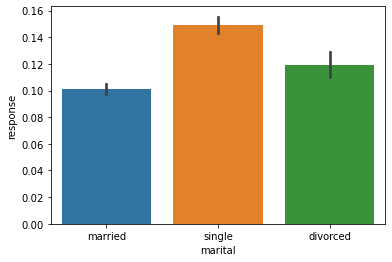

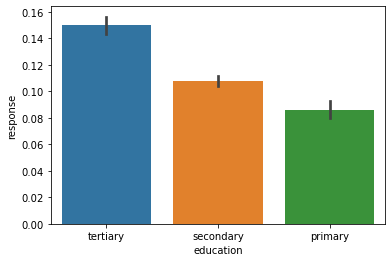

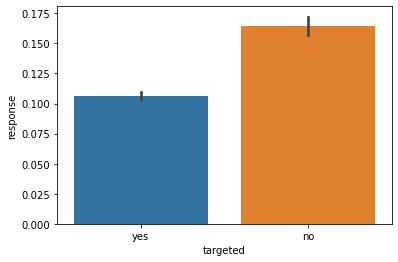

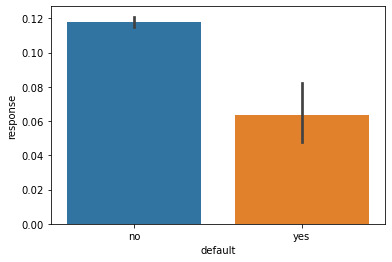

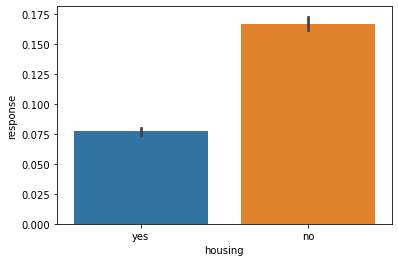

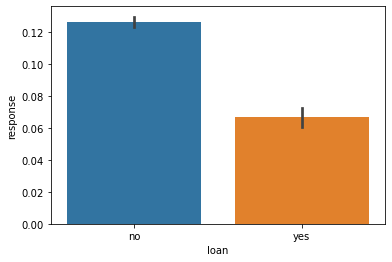

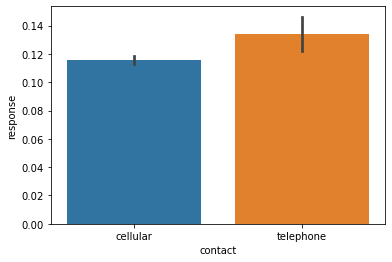

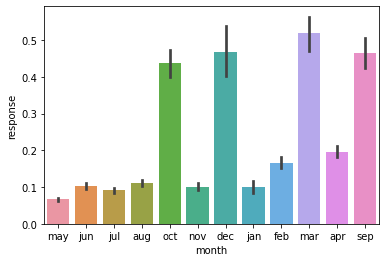

In [56]:
for i in df1_cat.columns:
    sns.barplot(df1_cat[i],df1['response'])
    plt.show()

# Inferences

Age group - 9 most likely buy the product 

Eligible People most likely buy the product

Married & Single People most likely buy the product

Secondary & Tertiary Educated People most likely buy the product

Targeted People most likely buy the product

People with No Default in Credit most likely buy the product

People with No Loans in Credit most likely buy the product

People contacted using Cellular phone most likely buy the product

# Encoding

In [64]:
for i in df1.columns:                      
    df1[i]= label_encoder.fit_transform(df1[i])

In [65]:
df1.head()

,age group,eligible,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response
0,4,1,4,9,1,2,1,0,2120,1,0,0,4,8,261,0,558,0,0
1,3,1,9,7,2,1,1,0,29,1,0,0,4,8,151,0,558,0,0
2,2,1,2,10,1,1,1,0,2,1,1,0,4,8,76,0,558,0,0
3,3,1,1,4,1,1,0,0,1504,1,0,0,4,8,92,0,558,0,0
4,2,1,1,0,2,1,0,0,1,0,0,0,4,8,198,0,558,0,0


# Class Imbalance

<AxesSubplot:>

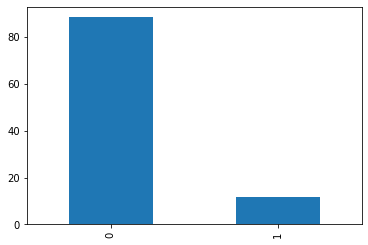

In [57]:
((df1['response'].value_counts(normalize=True))*100).plot(kind='bar')

##  Class is imbalanced,  resampling techniques to be used to balance it 

In [68]:
x = df1.drop('response',1)
y=df1['response']

In [75]:
smote = SMOTE(sampling_strategy=0.5,random_state=10)
x_sm,y_sm = smote.fit_resample(x,y)

In [76]:
df_sm = pd.DataFrame(x_sm,columns=x.columns)
df_sm['y']=y_sm

In [77]:
df_sm.head()

,age group,eligible,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,4,1,4,9,1,2,1,0,2120,1,0,0,4,8,261,0,558,0,0
1,3,1,9,7,2,1,1,0,29,1,0,0,4,8,151,0,558,0,0
2,2,1,2,10,1,1,1,0,2,1,1,0,4,8,76,0,558,0,0
3,3,1,1,4,1,1,0,0,1504,1,0,0,4,8,92,0,558,0,0
4,2,1,1,0,2,1,0,0,1,0,0,0,4,8,198,0,558,0,0


In [110]:
(df_sm['y'].value_counts(normalize=True)*100)

0   66.666667
1   33.333333
Name: y, dtype: float64

<AxesSubplot:>

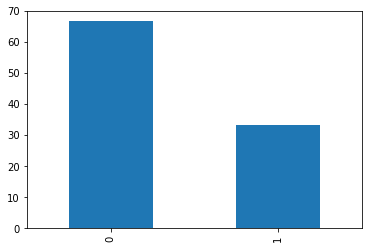

In [81]:
(df_sm['y'].value_counts(normalize=True)*100).plot(kind='bar')

In [88]:
x=df_sm.drop('y',1)
y=df_sm['y']

In [89]:
x.head()

,age group,eligible,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,4,1,4,9,1,2,1,0,2120,1,0,0,4,8,261,0,558,0
1,3,1,9,7,2,1,1,0,29,1,0,0,4,8,151,0,558,0
2,2,1,2,10,1,1,1,0,2,1,1,0,4,8,76,0,558,0
3,3,1,1,4,1,1,0,0,1504,1,0,0,4,8,92,0,558,0
4,2,1,1,0,2,1,0,0,1,0,0,0,4,8,198,0,558,0


In [90]:
x_cat = x[['age group','eligible','job','marital','education','targeted','default','housing','loan','contact','month']]

In [91]:
x_num = x[['salary','balance','day','duration','campaign','pdays','previous']]

# Scaling

In [94]:
from scipy.stats import zscore
X = pd.DataFrame(x_num.apply(zscore),columns=x_num.columns)
xscaled = pd.concat([X,x_cat],axis=1)
y=df_sm['y']

In [96]:
xscaled.head()

,salary,balance,day,duration,campaign,pdays,previous,age group,eligible,job,marital,education,targeted,default,housing,loan,contact,month
0,1.264257,0.267163,-1.304683,-0.203745,-0.546010,0.508247,-0.356075,4,1,4,1,2,1,0,1,0,0,8
1,0.375171,-0.810105,-1.304683,-0.579355,-0.546010,0.508247,-0.356075,3,1,9,2,1,1,0,1,0,0,8
2,1.708801,-0.824015,-1.304683,-0.835454,-0.546010,0.508247,-0.356075,2,1,2,1,1,1,0,1,1,0,8
3,-0.958460,-0.050196,-1.304683,-0.780819,-0.546010,0.508247,-0.356075,3,1,1,1,1,0,0,1,0,0,8
4,-2.736634,-0.824530,-1.304683,-0.418867,-0.546010,0.508247,-0.356075,2,1,1,2,1,0,0,0,0,0,8


## Train-Test split

In [97]:
xtrain,xtest,ytrain,ytest = train_test_split(xscaled,y,test_size=0.3,random_state=10)

# Base model

### Logistic Regression

In [98]:
log_model = LogisticRegression()

In [100]:
log_model.fit(xtrain,ytrain)

LogisticRegression()

In [102]:
ypred_prob = log_model.predict_proba(xtest)
ypred = [1 if p>0.5 else 0 for p in ypred_prob[:,1]]

#### Confusion Matrix

<AxesSubplot:>

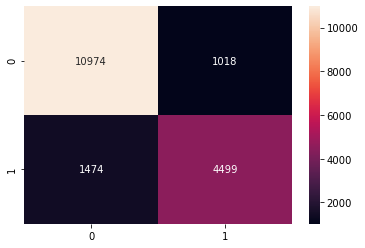

In [106]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,fmt='.6g')

#### Classification Report

In [113]:
y_train_pred_prob = log_model.predict_proba(xtrain)
y_train_pred = [1 if p>0.5 else 0 for p in y_train_pred_prob[:,1]]
print(classification_report(ytrain,y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     27930
           1       0.82      0.75      0.78     13988

    accuracy                           0.86     41918
   macro avg       0.85      0.83      0.84     41918
weighted avg       0.86      0.86      0.86     41918



In [111]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11992
           1       0.82      0.75      0.78      5973

    accuracy                           0.86     17965
   macro avg       0.85      0.83      0.84     17965
weighted avg       0.86      0.86      0.86     17965



#### ROC_AUC Score

In [132]:
roc_auc_score(ytrain,y_train_pred)

0.8320745463274183

In [129]:
roc_auc_score(ytest,ypred)

0.8341664547390095

### Bias & Variance Error

In [115]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(log_model,xtrain,ytrain,cv=k,scoring='roc_auc')

In [123]:
print('Bias error of train model is',round((1-np.mean(scores))*100,2),'%')

Bias error of train model is 7.56 %


In [125]:
print('Variance error of train model is',round((np.std(scores)/np.mean(scores))*100,2),'%')

Variance error of train model is 0.14 %


In [126]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(log_model,xtest,ytest,cv=k,scoring='roc_auc')

In [127]:
print('Bias error of test model is',round((1-np.mean(scores))*100,2),'%')

Bias error of test model is 7.56 %


In [128]:
print('Variance error of test model is',round((np.std(scores)/np.mean(scores))*100,2),'%')

Variance error of test model is 0.61 %


In [136]:
Train 

Recall(1) = 0.75
F1_weighted_average = 0.86
ROC_AUC_score = 0.83
Bias_error = 7.5%
Variance_error =  0.1%

In [ ]:
Test

Recall(1) = 0.75
F1_weighted average = 0.86
ROC_AUC score = 0.83
Bias error = 7.5%
Variance error =  0.6%

In [146]:
met=pd.DataFrame({'Train data performance':['0.75','0.86',' 0.83','7.5%','0.1%'],             
             'Test data performance':['0.75','0.86','0.83','7.5%','0.6%'],
             'Metrics':['Recall(1)','F1_weighted average','ROC_AUC score','Bias error','Variance error']})

In [147]:
met = met.set_index('Metrics')

In [151]:
met

,Train data performance,Test data performance
Metrics,,
Recall(1),0.75,0.75
F1_weighted average,0.86,0.86
ROC_AUC score,0.83,0.83
Bias error,7.5%,7.5%
Variance error,0.1%,0.6%


# According to the Metrics, there is no Overfitting/Underfitting in the data

## Since we are concerned on Positives (1's) which implies the Customer would buy the product, we must focus on "Recall Score of 1" by making the False Negatives minimum                                    